In [1]:
#importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from scipy.stats import binom
from scipy.stats import uniform
from scipy.stats import norm
from scipy.stats import stats

In [2]:
sat=pd.read_csv(r'C:\Users\rober\Documents\Data Science\Code (all)\Portfolio\Kaggle projects\Datasets\sat_scores.csv') #importing datafile

In [6]:
sat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   student_id                     1000 non-null   object 
 1   age                            1000 non-null   int64  
 2   gender                         1000 non-null   object 
 3   study_hours_per_day            1000 non-null   float64
 4   social_media_hours             1000 non-null   float64
 5   netflix_hours                  1000 non-null   float64
 6   part_time_job                  1000 non-null   object 
 7   attendance_percentage          1000 non-null   float64
 8   sleep_hours                    1000 non-null   float64
 9   diet_quality                   1000 non-null   object 
 10  exercise_frequency             1000 non-null   int64  
 11  parental_education_level       909 non-null    object 
 12  internet_quality               1000 non-null   ob

In [7]:
sat[sat.duplicated()] #checking for duplicates

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score


In [8]:
sat.head()

,student_id,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
0,S1000,23,Female,0.0,1.2,1.1,No,85.0,8.0,Fair,6,Master,Average,8,Yes,56.2
1,S1001,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
2,S1002,21,Male,1.4,3.1,1.3,No,94.8,8.0,Poor,1,High School,Poor,1,No,34.3
3,S1003,23,Female,1.0,3.9,1.0,No,71.0,9.2,Poor,4,Master,Good,1,Yes,26.8
4,S1004,19,Female,5.0,4.4,0.5,No,90.9,4.9,Fair,3,Master,Good,1,No,66.4


In [9]:
sat=sat.drop('student_id', axis=1) #dropping Student ID as it has no bearing on data

In [10]:
sat[sat['parental_education_level'].isnull()] #checking null values

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
10,19,Female,4.6,3.7,0.8,No,77.6,5.8,Fair,1,NaN,Good,3,No,63.3
33,18,Female,4.0,0.9,1.1,No,99.5,5.8,Poor,2,NaN,Average,5,No,70.7
47,23,Female,2.5,2.9,2.7,No,83.5,7.0,Good,4,NaN,Good,8,Yes,59.7
74,21,Female,2.3,1.0,0.4,No,100.0,6.4,Fair,6,NaN,Good,1,No,66.9
93,22,Male,4.1,2.5,3.0,No,85.1,5.8,Good,4,NaN,Good,5,No,70.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
921,23,Female,4.4,2.7,1.0,No,79.8,6.1,Fair,6,NaN,Average,3,No,85.4
925,19,Other,1.7,2.9,1.6,Yes,97.3,8.7,Good,1,NaN,Good,7,No,53.6
939,18,Female,4.7,3.2,1.9,No,75.2,5.4,Good,3,NaN,Good,6,No,71.0
945,23,Male,6.0,2.9,2.1,Yes,98.9,6.4,Poor,0,NaN,Average,7,No,100.0


In [11]:
sat.describe(include='object').T #checking unique entries for non-numeric categories

,count,unique,top,freq
gender,1000,3,Female,481
part_time_job,1000,2,No,785
diet_quality,1000,3,Fair,437
parental_education_level,909,3,High School,392
internet_quality,1000,3,Good,447
extracurricular_participation,1000,2,No,682


In [12]:
sat=sat.dropna(subset=['parental_education_level']) #dropping null rows for parental education level

In [13]:
sat.describe().T

,count,mean,std,min,25%,50%,75%,max
age,909.0,20.475248,2.302721,17.0,18.0,20.0,22.0,24.0
study_hours_per_day,909.0,3.538724,1.469730,0.0,2.5,3.5,4.5,8.3
social_media_hours,909.0,2.504620,1.164802,0.0,1.7,2.5,3.3,7.2
netflix_hours,909.0,1.830363,1.071251,0.0,1.0,1.8,2.6,5.4
attendance_percentage,909.0,83.880308,9.453622,56.0,77.5,84.2,90.7,100.0
sleep_hours,909.0,6.474037,1.218943,3.2,5.6,6.5,7.3,10.0
exercise_frequency,909.0,3.051705,2.035632,0.0,1.0,3.0,5.0,6.0
mental_health_rating,909.0,5.466447,2.857525,1.0,3.0,5.0,8.0,10.0
exam_score,909.0,69.558196,16.929436,18.4,58.4,70.4,81.3,100.0


In [ ]:
sat[sat['exam_score']==100]

,age,gender,study_hours_per_day,social_media_hours,netflix_hours,part_time_job,attendance_percentage,sleep_hours,diet_quality,exercise_frequency,parental_education_level,internet_quality,mental_health_rating,extracurricular_participation,exam_score
1,20,Female,6.9,2.8,2.3,No,97.3,4.6,Good,6,High School,Average,8,No,100.0
5,24,Male,7.2,1.3,0.0,No,82.9,7.4,Fair,1,Master,Average,4,No,100.0
9,18,Female,4.8,3.1,1.3,No,95.4,7.5,Good,5,Bachelor,Good,10,Yes,100.0
69,22,Male,6.8,3.7,1.8,No,72.3,7.5,Poor,6,Master,Average,5,No,100.0
76,20,Male,6.0,2.5,2.9,No,85.1,6.7,Poor,5,Bachelor,Average,10,Yes,100.0
131,21,Female,7.2,3.7,0.0,No,100.0,7.8,Good,6,High School,Good,9,No,100.0
219,23,Female,6.2,2.8,1.0,No,84.9,7.0,Fair,5,Master,Good,4,No,100.0
222,22,Male,6.7,2.9,2.0,No,83.2,6.6,Good,6,Bachelor,Average,5,No,100.0
230,22,Male,4.2,0.3,0.1,No,80.0,7.9,Poor,3,High School,Poor,9,Yes,100.0
232,20,Female,6.5,0.7,1.7,No,77.3,6.3,Good,4,Master,Average,3,No,100.0


In [14]:
sat.info() #double-checking for null values

<class 'pandas.core.frame.DataFrame'>
Index: 909 entries, 0 to 999
Data columns (total 15 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            909 non-null    int64  
 1   gender                         909 non-null    object 
 2   study_hours_per_day            909 non-null    float64
 3   social_media_hours             909 non-null    float64
 4   netflix_hours                  909 non-null    float64
 5   part_time_job                  909 non-null    object 
 6   attendance_percentage          909 non-null    float64
 7   sleep_hours                    909 non-null    float64
 8   diet_quality                   909 non-null    object 
 9   exercise_frequency             909 non-null    int64  
 10  parental_education_level       909 non-null    object 
 11  internet_quality               909 non-null    object 
 12  mental_health_rating           909 non-null    int64  


In [15]:
cat_cols =(['gender','part_time_job','diet_quality', 'parental_education_level', 'internet_quality', 'extracurricular_participation'])

In [16]:
num_cols=(['age', 'study_hours_per_day', 'social_media_hours','netflix_hours', 'attendance_percentage','sleep_hours','exercise_frequency','mental_health_rating'])

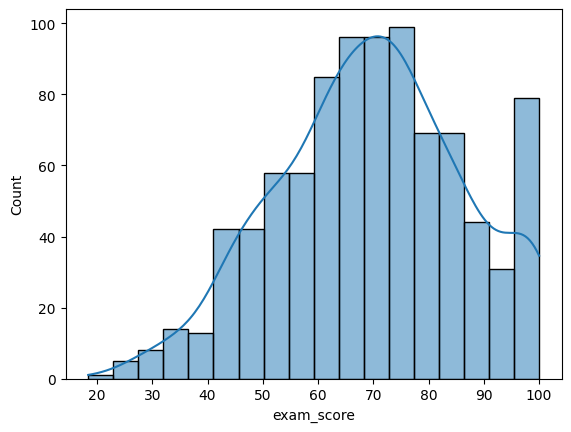

In [17]:
sns.histplot (sat['exam_score'], kde=True);

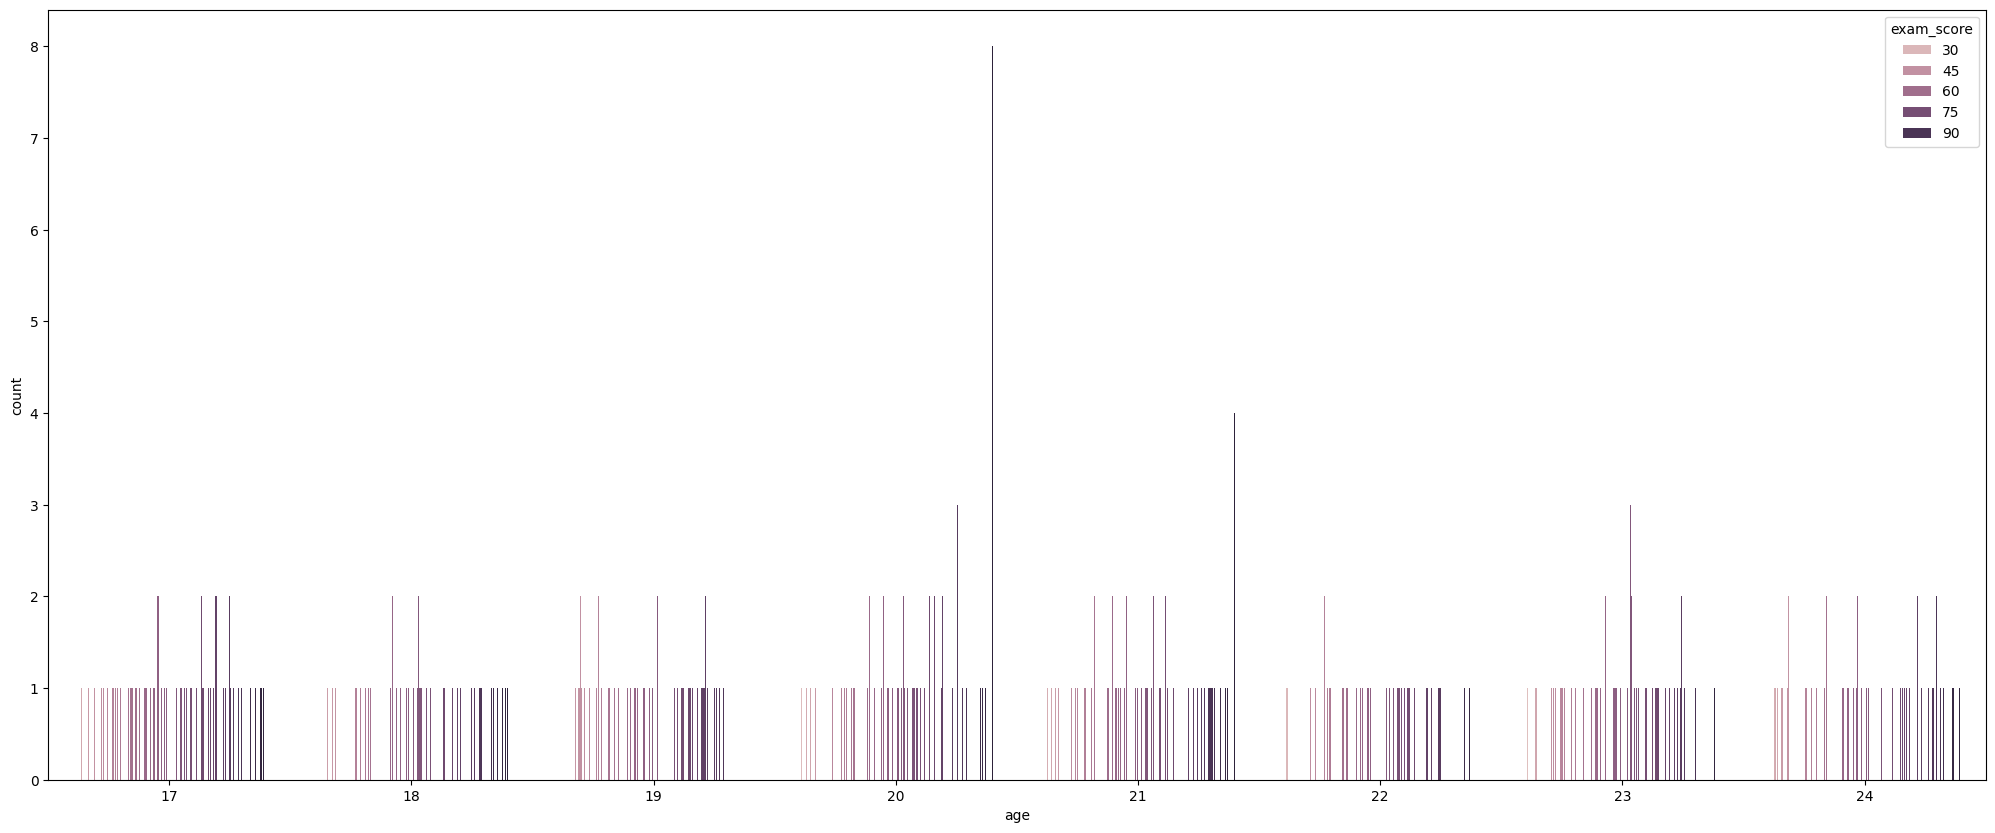

In [18]:
plt.figure(figsize=(25,10))
sns.countplot(x=sat['age'], hue=sat['exam_score']);

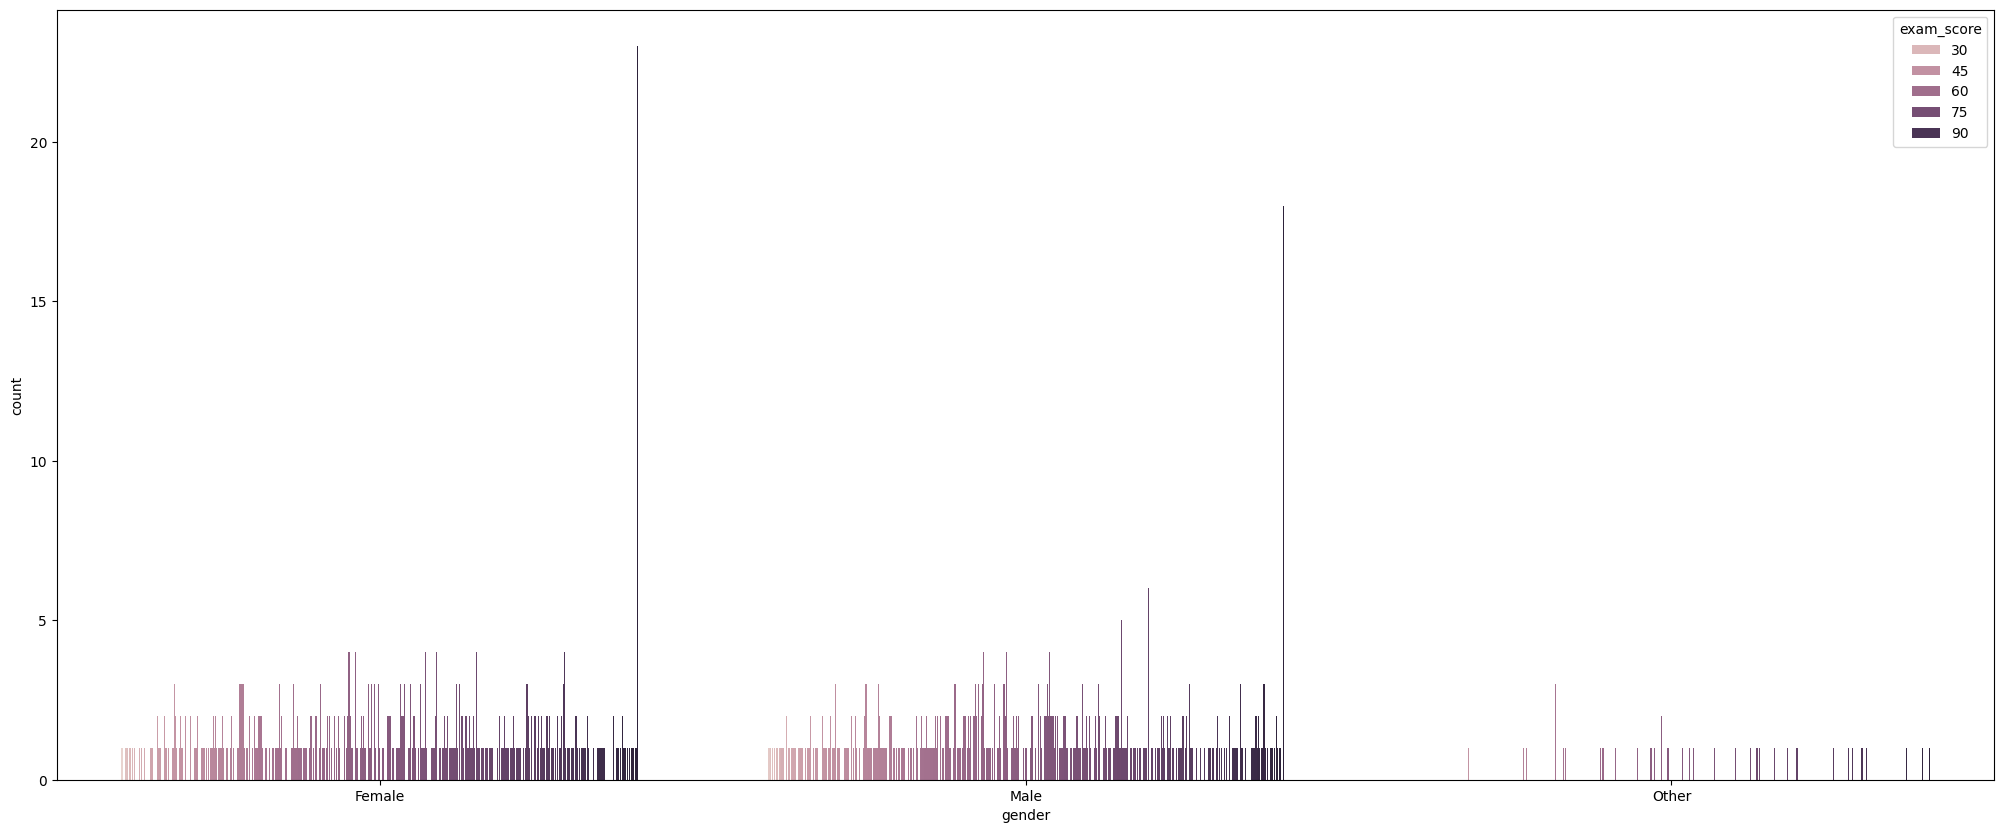

In [19]:
plt.figure(figsize=(25,10))
sns.countplot (x=sat['gender'], hue=sat['exam_score']);

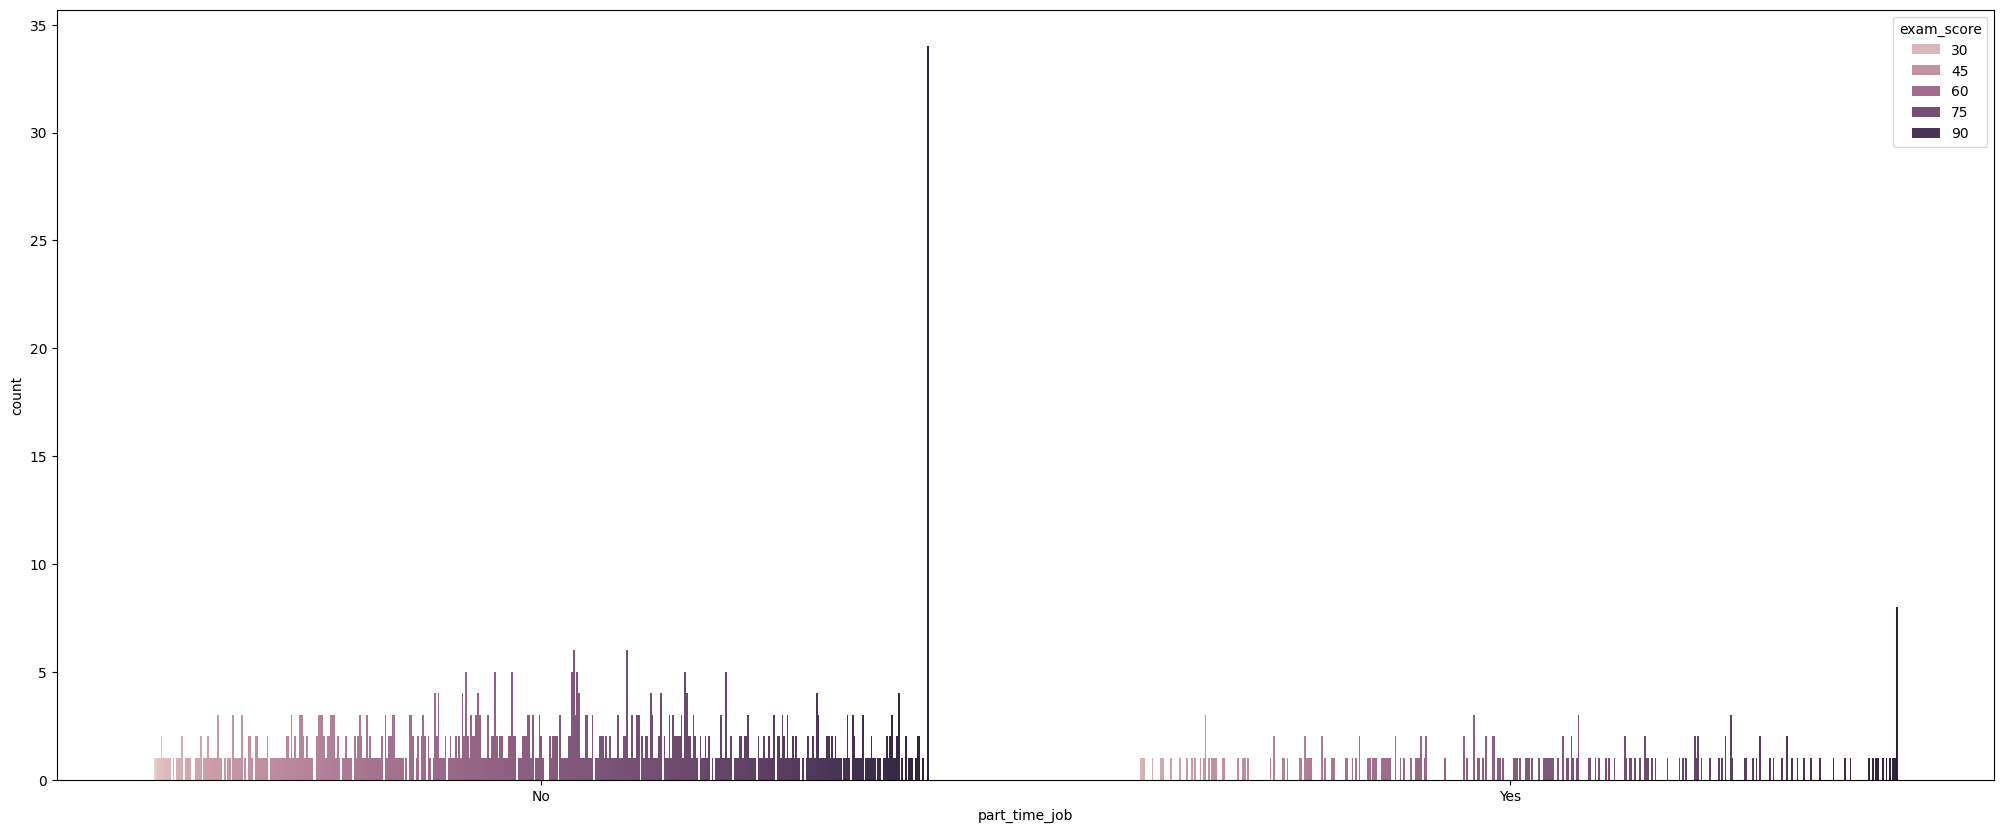

In [ ]:
plt.figure(figsize=(25,10))
sns.countplot (x=sat['part_time_job'], hue=sat['exam_score']);

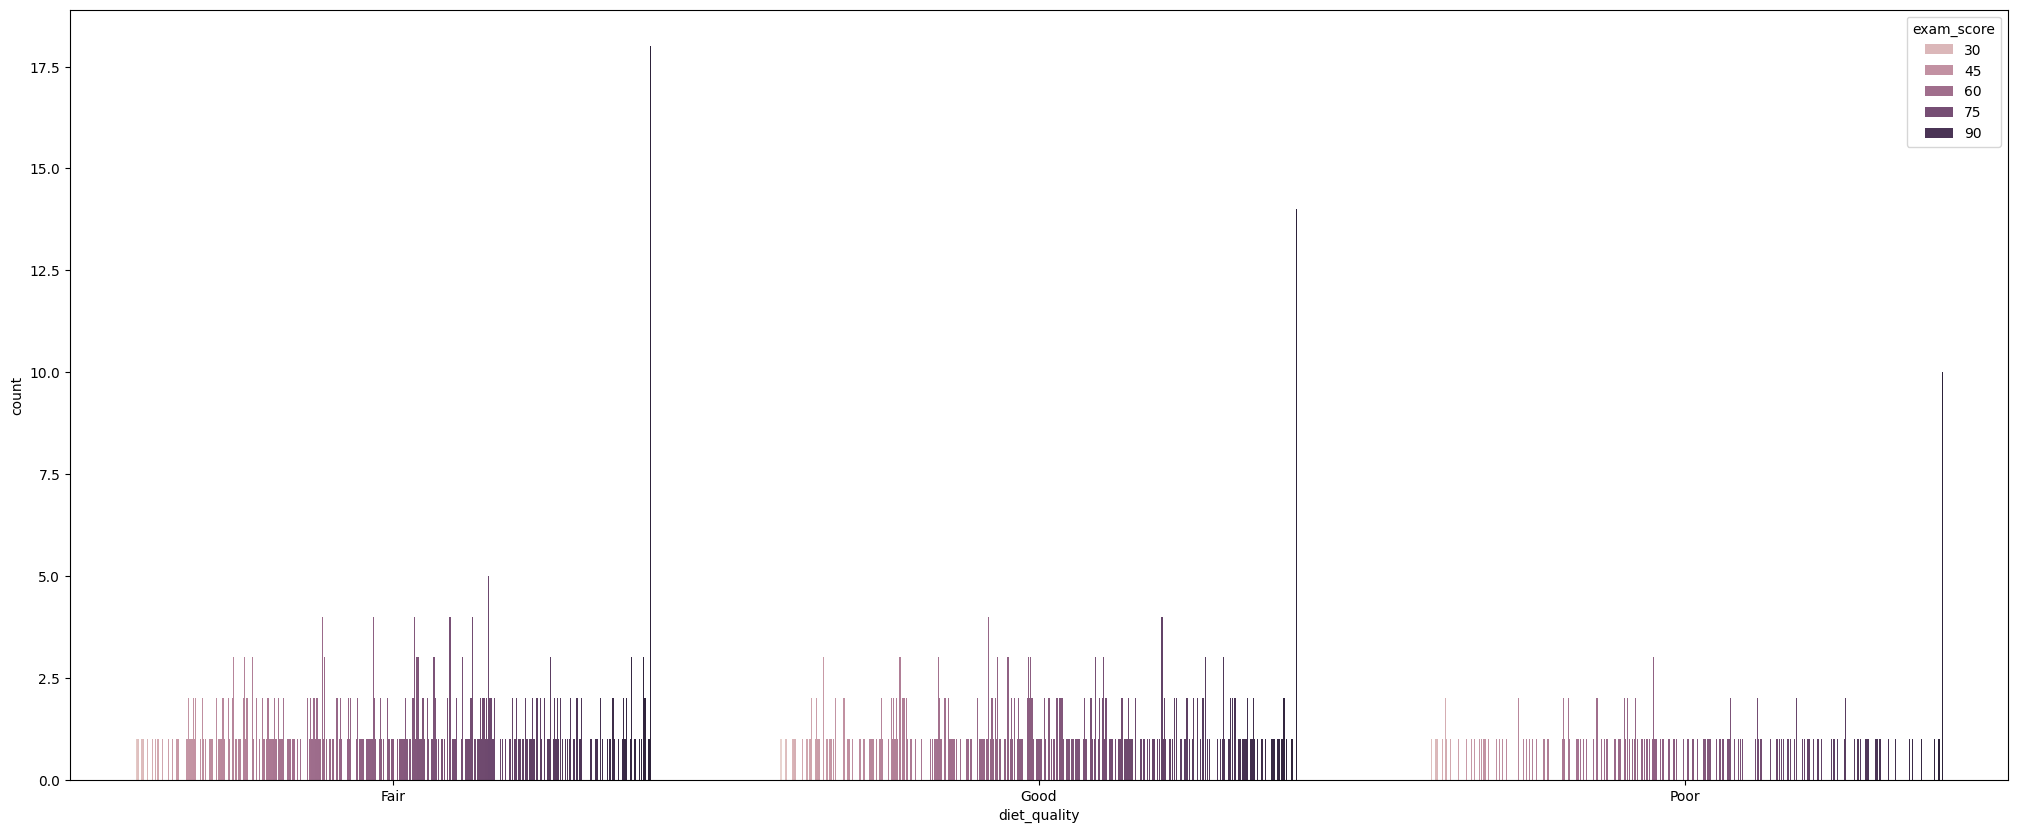

In [20]:
plt.figure(figsize=(25,10))
sns.countplot(x=sat['diet_quality'], hue=sat['exam_score']);

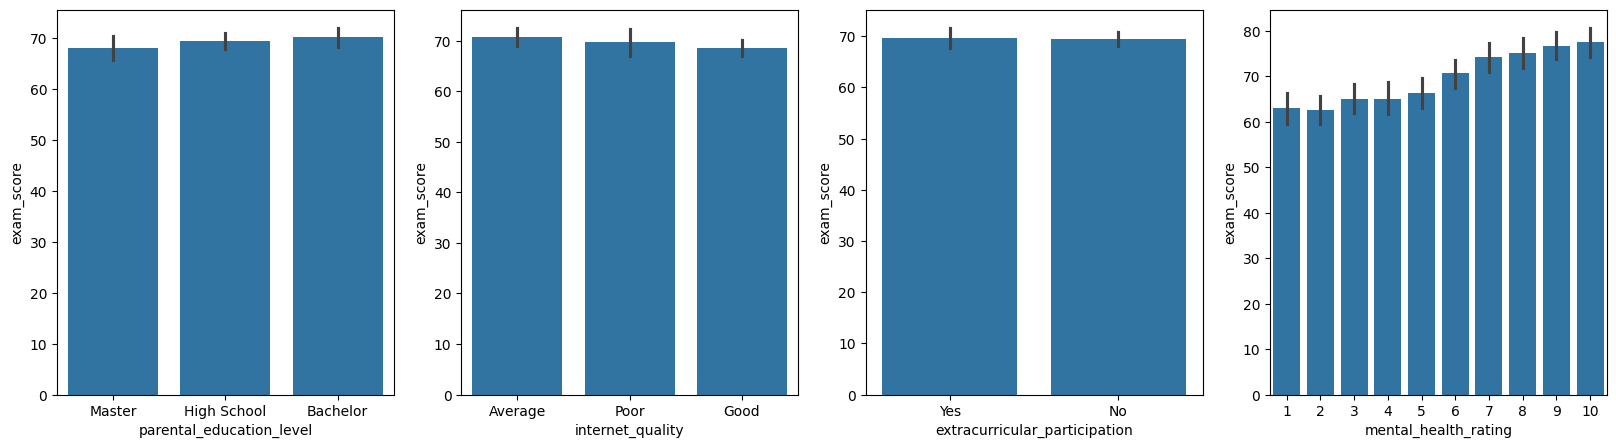

In [21]:
plt.figure(figsize=(20,5))
plt.subplot(1,4,1)
sns.barplot(x=sat['parental_education_level'], y=sat['exam_score'])
plt.subplot(1,4,2)
sns.barplot (x=sat['internet_quality'], y=sat['exam_score'])
plt.subplot(1,4,3)
sns.barplot (x=sat['extracurricular_participation'], y=sat['exam_score'])
plt.subplot(1,4,4)
sns.barplot(x=sat['mental_health_rating'], y=sat['exam_score'])
plt.show()

In [22]:
#checking for unique variables in distribution of non-numeric categories
for i in cat_cols:
    print(sat[i].value_counts(normalize=True))
    print('-'*30)

gender
Male      0.484048
Female    0.476348
Other     0.039604
Name: proportion, dtype: float64
------------------------------
part_time_job
No     0.784378
Yes    0.215622
Name: proportion, dtype: float64
------------------------------
diet_quality
Fair    0.435644
Good    0.381738
Poor    0.182618
Name: proportion, dtype: float64
------------------------------
parental_education_level
High School    0.431243
Bachelor       0.385039
Master         0.183718
Name: proportion, dtype: float64
------------------------------
internet_quality
Good       0.451045
Average    0.387239
Poor       0.161716
Name: proportion, dtype: float64
------------------------------
extracurricular_participation
No     0.682068
Yes    0.317932
Name: proportion, dtype: float64
------------------------------


**PRELIMINARY OBSERVATIONS**

No duplicate data.

There were missing values for Parental Education. Decided to remove those rows versus filling them with "None" (for no education). While it is definitely possible for No education (as not everyone has gone to school), I decided removing only 91 rows of data would not affect the overall dataset significantly.

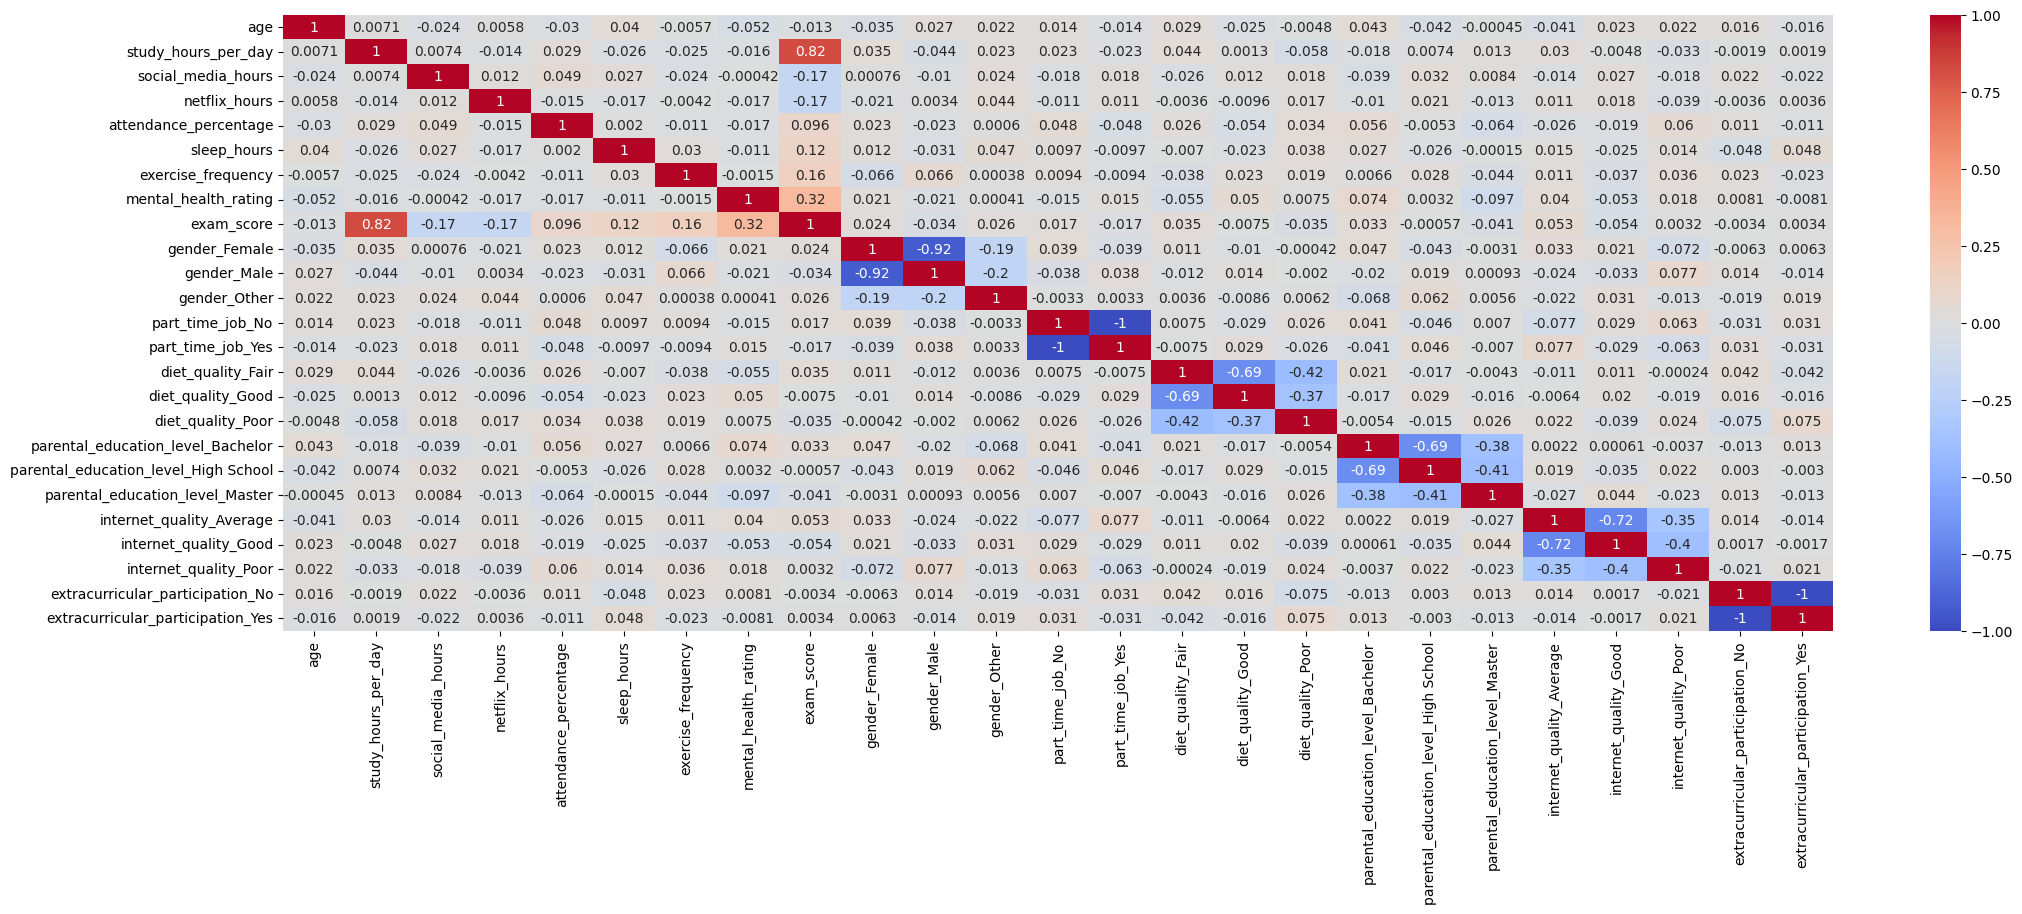

In [23]:
X = pd.get_dummies(sat, columns=cat_cols)
plt.figure(figsize=(25,8))
sat_corr=X.corr()
sns.heatmap(sat_corr, annot=True, cmap='coolwarm')
plt.show()

In [24]:
#Setting up multiple linear regression
#Use a train/test split to get a real sense of performance
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression #<-----
from sklearn.metrics import r2_score

# Separate features (X) and target (y) before one-hot encoding
y = sat['exam_score']
X = pd.get_dummies(sat, columns=cat_cols)
X = sat.drop('exam_score', axis=1)
X = pd.get_dummies(X, columns=cat_cols)




# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LinearRegression() #<-----
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


**OBSERVATIONS**

Heatmap shows high correlation with study hours per day and exam score.

The most positive correlations with exam score include attendance percentage, sleep hours, exercise frequency, and mental health rating.

In [25]:
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
print("R² Score:", r2)

from sklearn.metrics import mean_squared_error

# Remove the 'squared=False' argument and take the square root to get RMSE
rmse = mean_squared_error(y_test, y_pred)**0.5
print("RMSE:", rmse)

R² Score: 0.8894237196898983
RMSE: 5.478508567749666


In [26]:
# Intercept (b0)
intercept = model.intercept_

# Coefficients (b1, b2, ..., bn)
coefficients = model.coef_

# Print everything nicely
print("Intercept:", intercept)
for feature, coef in zip(X_train.columns, coefficients):
    print(f"{feature}: {coef}")

Intercept: 4.74234224616778
age: -0.0638240002523977
study_hours_per_day: 9.609512116625575
social_media_hours: -2.647462713951964
netflix_hours: -2.1479754119483445
attendance_percentage: 0.16904485757453006
sleep_hours: 2.0229368492127766
exercise_frequency: 1.5309944753587388
mental_health_rating: 1.9806876314991575
gender_Female: 0.024077696135417225
gender_Male: -0.08812414061123593
gender_Other: 0.06404644447581784
part_time_job_No: -0.20710800084371064
part_time_job_Yes: 0.20710800084371064
diet_quality_Fair: 0.22834581059940717
diet_quality_Good: -0.4461178322269696
diet_quality_Poor: 0.2177720216275638
parental_education_level_Bachelor: 0.13608422001346962
parental_education_level_High School: -0.07115962033873317
parental_education_level_Master: -0.06492459967473645
internet_quality_Average: 0.22879578410644852
internet_quality_Good: -0.12195263496052856
internet_quality_Poor: -0.10684314914592113
extracurricular_participation_No: 0.19557591602728874
extracurricular_participa

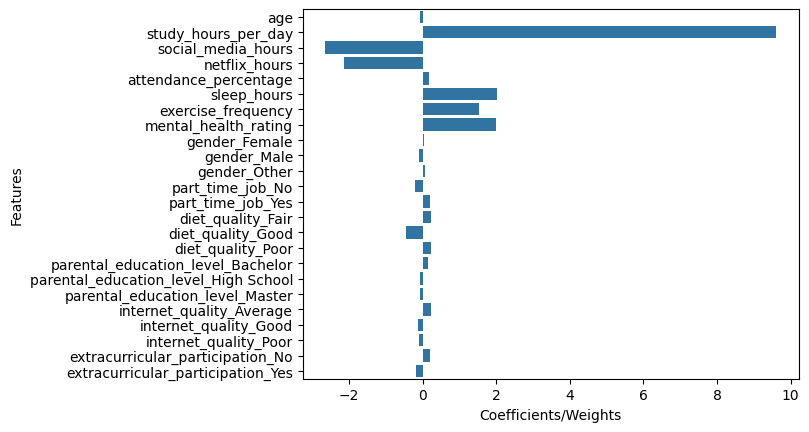

In [27]:
#visualizing what features affect exam scores most
sns.barplot(x=coefficients, y= X_train.columns)
plt.ylabel('Features')
plt.xlabel('Coefficients/Weights')
plt.show()

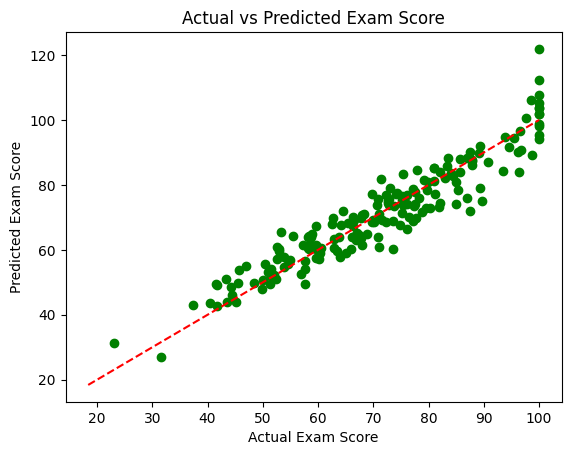

In [28]:
plt.scatter(y_test, y_pred, color='green')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', linestyle='--')
plt.xlabel('Actual Exam Score')
plt.ylabel('Predicted Exam Score')
plt.title('Actual vs Predicted Exam Score')
plt.show()

**OBSERVATIONS**

The linear regression coefficients reinforce the highest correlations in the heatmap.

Study hours per day is by far the biggest factor in increasing exam scores (no surprise).

Not surprisingly, reducing social media and netflix hours will help increase exam scores, as well.

The linear regression model shows the predicted exam scores are pretty accurate save for the highest predicted scores.